In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score

In [123]:
df = pd.read_csv("stroke.csv")

In [124]:
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [126]:
df.shape

(5110, 12)

In [127]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


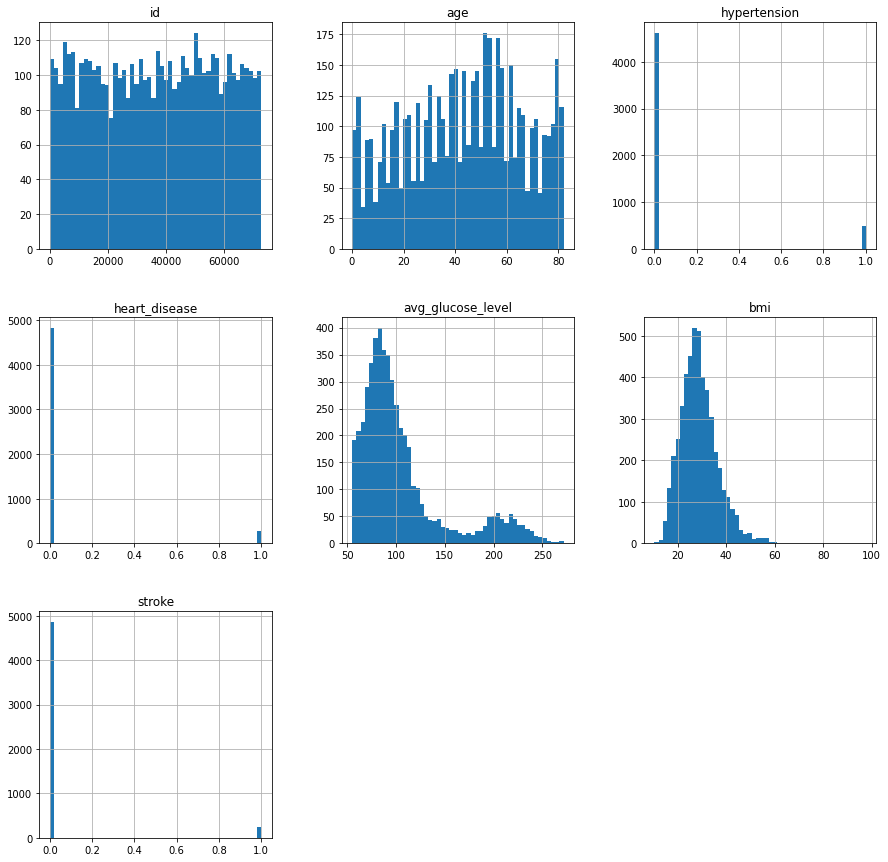

In [128]:
df.hist(bins=50,figsize=(15,15));

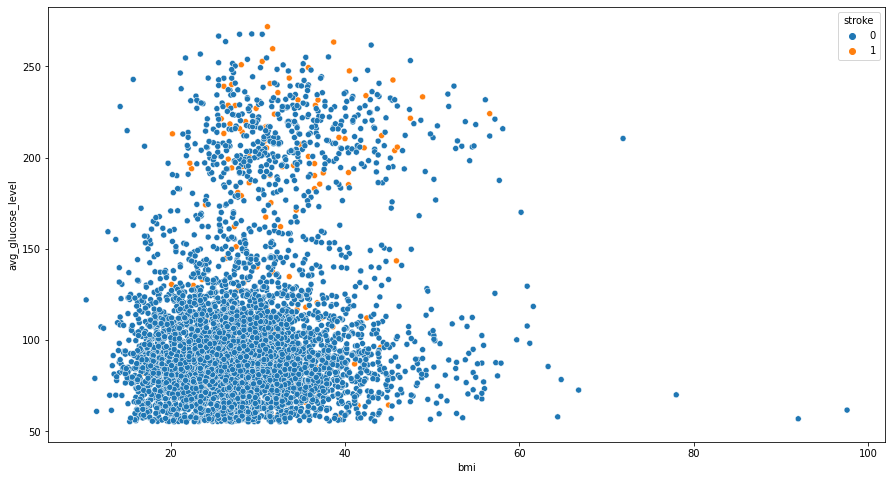

In [190]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'],hue= df['stroke'])

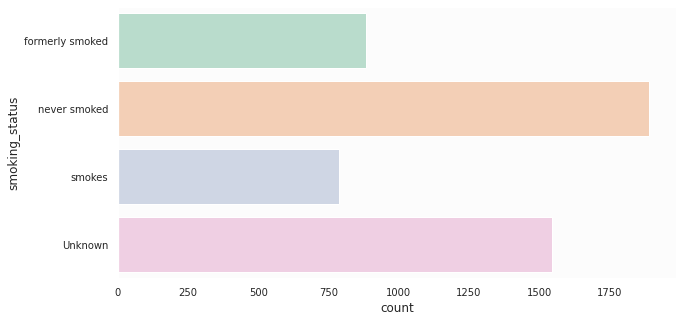

In [191]:
plt.figure(figsize=(10,5))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
sns.countplot(y ='smoking_status',data = df,palette = "Pastel2")


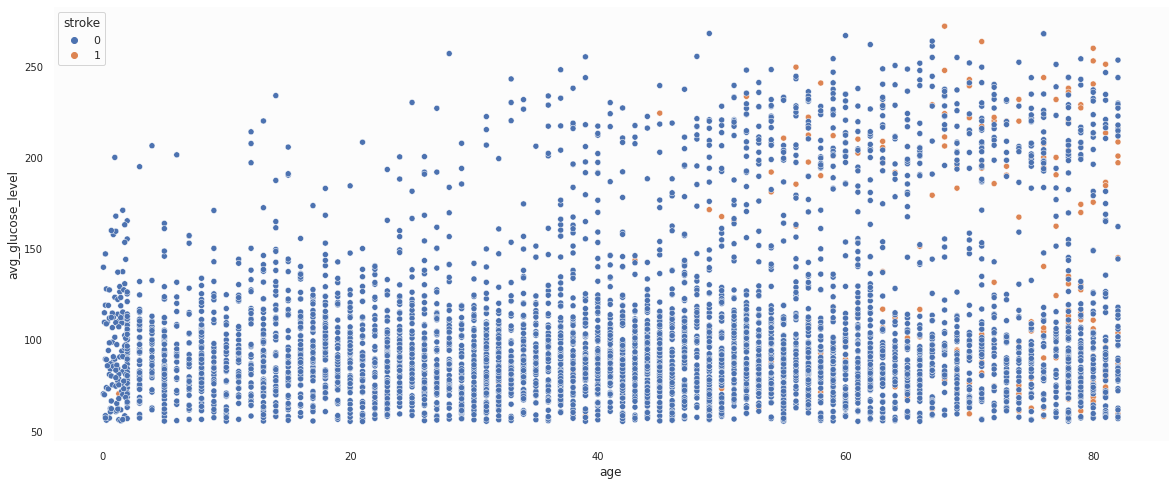

In [192]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x="age", y="avg_glucose_level", sizes=(20, 2000),hue= 'stroke')

In [129]:
df1 = df.copy()

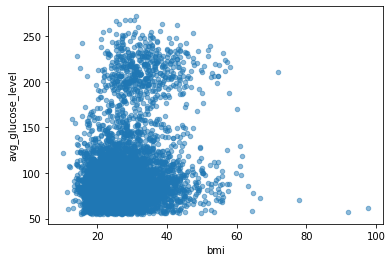

In [130]:
df1.plot(kind='scatter', x= "bmi", y = "avg_glucose_level",alpha = 0.5)

In [131]:
corr_matrix = df1.corr()

In [132]:
corr_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [133]:
df1 = df1.drop('id',axis =1)


In [134]:
df1 = df1.dropna()

In [135]:
df1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
cat_encoder = OneHotEncoder()

In [138]:
smoking_cat = df1[['smoking_status']]

In [139]:
dummy_values= cat_encoder.fit_transform(smoking_cat)
dummy_values.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [140]:
cat_encoder.categories_

[array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [141]:
smoking_cat = pd.DataFrame(dummy_values.toarray())
smoking_cat.head()

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0


In [142]:
smoking_cat.columns = ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

In [143]:
smoking_cat.head()

,Unknown,formerly smoked,never smoked,smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0


In [144]:
gender_cat = df1[['gender']]
dummy_values1 = cat_encoder.fit_transform(gender_cat)
dummy_values1.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [145]:
cat_encoder.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [146]:
gender_cat = pd.DataFrame(dummy_values1.toarray())
gender_cat.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [147]:
gender_cat.columns = ['Female', 'Male', 'Other']

In [148]:
gender_cat.head()

,Female,Male,Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [149]:
df1['ever_married'] = df1['ever_married'].map({'Yes':1, 'No':0})

In [150]:
df1['Residence_type'] = df1['Residence_type'].map({'Urban':0,'Rural':1})

In [151]:
work_cat = df1[['work_type']]
dummy_values2 = cat_encoder.fit_transform(work_cat)
dummy_values2.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [152]:
cat_encoder.categories_

[array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object)]

In [153]:
work_cat = pd.DataFrame(dummy_values2.toarray())
work_cat.head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [154]:
work_cat.columns = ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
work_cat.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [155]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [156]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,0,186.21,29.0,formerly smoked,1


In [157]:
df1[['age','avg_glucose_level']] = std_scaler.fit_transform(df1[['age','avg_glucose_level']])
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.070138,0,1,1,Private,0,2.777698,36.6,formerly smoked,1
2,Male,1.646563,0,1,1,Private,1,0.013842,32.5,never smoked,1
3,Female,0.272012,0,0,1,Private,0,1.484132,34.4,smokes,1
4,Female,1.602222,1,0,1,Self-employed,1,1.549193,24.0,never smoked,1
5,Male,1.690903,0,0,1,Private,0,1.821368,29.0,formerly smoked,1


In [158]:
std_scaler1 = StandardScaler()
df1[['bmi']] = std_scaler.fit_transform(df1[['bmi']])

In [159]:
df1 = df1.drop(['gender','work_type','smoking_status'],axis =1)


In [160]:
df_final = pd.concat([df1,gender_cat,smoking_cat,work_cat], axis =1, join='inner' )

In [161]:
df_final.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,1.070138,0,1,1,0,2.777698,0.981345,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.646563,0,1,1,1,0.013842,0.459269,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.272012,0,0,1,0,1.484132,0.701207,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.602222,1,0,1,1,1.549193,-0.623083,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.690903,0,0,1,0,1.821368,0.013595,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [162]:
corr_matrix = df_final.corr()
corr_matrix

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
age,1.000000,0.277057,0.260348,0.679444,-0.013198,0.235172,0.330257,0.236231,0.012161,-0.011762,-0.013535,-0.009528,0.003990,0.008938,-0.004119,0.007450,-0.030879,-0.013025,0.017124,-0.000530
hypertension,0.277057,1.000000,0.117594,0.162675,-0.002772,0.181149,0.166673,0.143486,0.006250,-0.006112,-0.004671,-0.018496,-0.013390,0.007414,0.027894,0.021291,-0.000558,0.017486,-0.016800,-0.027933
heart_disease,0.260348,0.117594,1.000000,0.112009,-0.000675,0.155977,0.042405,0.137195,0.001389,-0.001289,-0.003379,-0.013958,-0.010316,0.012885,0.011327,-0.005214,-0.015884,0.011482,0.005251,-0.013884
ever_married,0.679444,0.162675,0.112009,1.000000,-0.008273,0.149480,0.340292,0.106715,0.011757,-0.011165,-0.020030,-0.012932,0.011449,-0.004340,0.010507,0.016686,-0.002571,-0.013861,0.023545,-0.020729
Residence_type,-0.013198,-0.002772,-0.000675,-0.008273,1.000000,0.005043,-0.000120,-0.007218,-0.030365,0.030794,-0.014423,0.008115,-0.016550,0.003532,0.002198,0.008097,0.000653,-0.027094,0.007619,0.022926
avg_glucose_level,0.235172,0.181149,0.155977,0.149480,0.005043,1.000000,0.175551,0.141676,0.009001,-0.009078,0.002560,-0.005667,0.000274,0.015691,-0.014386,0.025402,-0.019885,0.000808,0.004703,-0.026897
bmi,0.330257,0.166673,0.042405,0.340292,-0.000120,0.175551,1.000000,0.042493,-0.001607,0.002107,-0.016884,0.000169,0.015644,-0.000499,-0.016067,-0.001045,-0.014171,0.005262,-0.002244,-0.001369
stroke,0.236231,0.143486,0.137195,0.106715,-0.007218,0.141676,0.042493,1.000000,0.015928,-0.015836,-0.003135,-0.062874,0.042271,0.009860,0.022997,-0.008385,0.000381,0.029651,0.039670,-0.076700
Female,0.012161,0.006250,0.001389,0.011757,-0.030365,0.009001,-0.001607,0.015928,1.000000,-0.999562,-0.017483,-0.055027,-0.040268,0.091995,-0.011978,0.012883,-0.012586,0.039308,0.022153,-0.090117
Male,-0.011762,-0.006112,-0.001289,-0.011165,0.030794,-0.009078,0.002107,-0.015836,-0.999562,1.000000,-0.012123,0.055315,0.039319,-0.091665,0.012159,-0.012719,0.012617,-0.039684,-0.021968,0.090296


In [163]:
X = df_final.drop(['stroke'],axis =1)
y = df_final['stroke']

In [164]:
df_final.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,1.070138,0,1,1,0,2.777698,0.981345,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.646563,0,1,1,1,0.013842,0.459269,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.272012,0,0,1,0,1.484132,0.701207,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.602222,1,0,1,1,1.549193,-0.623083,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.690903,0,0,1,0,1.821368,0.013595,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [165]:
X.head(2)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,1.070138,0,1,1,0,2.777698,0.981345,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.646563,0,1,1,1,0.013842,0.459269,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [166]:
y.head(2)

0    1
2    1
Name: stroke, dtype: int64

In [167]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)


In [168]:
y.value_counts()

1    4508
0    4508
Name: stroke, dtype: int64

In [169]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
feature_selection=SelectKBest(f_classif,k=5).fit(X,y)

In [170]:
feature_selection.get_feature_names_out()

array(['age', 'ever_married', 'avg_glucose_level', 'Unknown', 'children'],
      dtype=object)

In [171]:
selected_features=feature_selection.get_support()

In [172]:
X_new = X[X.columns[selected_features]]

In [173]:
X_new.head()

,age,ever_married,avg_glucose_level,Unknown,children
0,1.070138,1,2.777698,0.0,0.0
1,1.646563,1,0.013842,0.0,0.0
2,0.272012,1,1.484132,0.0,0.0
3,1.602222,1,1.549193,0.0,0.0
4,1.690903,1,1.821368,0.0,0.0


In [174]:
X_new = X_new.drop('Unknown', axis = 1)

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train,y_test = train_test_split(X_new,y, test_size=0.25, random_state=42)

In [177]:
classifiers = [('LR', LogisticRegression()),
               ('KNN', KNeighborsClassifier()),
               ("SVC", SVC()),
               ("CART", DecisionTreeClassifier()),
               ("RF", RandomForestClassifier()),
               ]

for name, classifier in classifiers:
    cv_results = cross_val_score(classifier, X_train, y_train, cv=10, scoring="roc_auc")
    print(cv_results.mean(), ({name}))

0.8666228666425615 {'LR'}
0.8716098022553089 {'KNN'}
0.8616083841217312 {'SVC'}
0.9304636315293255 {'CART'}
0.9580904378174064 {'RF'}


In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
param_grid = {
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}


rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                         cv = 3,scoring="roc_auc")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='roc_auc')

In [180]:
grid_search.best_score_

0.9630574276446321

In [181]:
grid_search.best_params_

{'max_features': 3, 'n_estimators': 300}

In [182]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(max_features=3, n_estimators=300)

In [183]:
final_prediction = final_model.predict(X_test)

In [184]:
final_acc = accuracy_score(y_test, final_prediction)
final_acc


0.922360248447205

In [185]:
cm = confusion_matrix(y_test, final_prediction)
cm

array([[1041,   77],
       [  98, 1038]])